## **Water Contamination Risk - Morocco**

### **Exploratory Data Analysis (EDA)**

#### **Step 1: Importing Libraries and Loading the Dataset**

This section imports the necessary Python libraries and loads the dataset containing information on water sources in Morocco. 
The dataset includes details such as region, water source type, rainfall, temperature, and contamination risk.

``I then display a preview of the dataset to understand its structure and contents.``

In [31]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "large_water_contamination_data.csv" 
df = pd.read_csv(file_path)

print("🔍 Preview of the dataset:")
df

🔍 Preview of the dataset:


,source_id,region,source_type,avg_rainfall_mm,last_rain_days,pop_served,nearby_agriculture,temp_c,soil_moisture,contamination_risk
0,S1,Rabat,river,82,26,370,no,41,very_low,high
1,S2,Rabat,spring,93,11,679,no,35,low,high
2,S3,El Jadida,river,69,91,912,yes,33,very_low,high
3,S4,Tanger,well,50,33,92,no,24,high,medium
4,S5,Errachidia,shared_tap,81,52,815,no,26,low,low
...,...,...,...,...,...,...,...,...,...,...
95,S96,Taza,well,57,14,920,yes,16,high,medium
96,S97,Taza,shared_tap,94,3,384,yes,42,high,very_high
97,S98,Rabat,river,59,67,300,yes,16,medium,medium
98,S99,Fes,spring,55,13,937,yes,19,low,medium


##### **STEP 2:** Clean and Prepare the Data for Machine Learning

Before I can train a model, I need to:

- **Convert categorical features (like `source_type`, `soil_moisture`, `nearby_agriculture`) into numeric form**

- **Check for and handle any missing values** 

- **Separate the features (`X`) from the target variable (`y`)**

In [17]:
# step 1 : check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)


source_id             0
region                0
source_type           0
avg_rainfall_mm       0
last_rain_days        0
pop_served            0
nearby_agriculture    0
temp_c                0
soil_moisture         0
contamination_risk    0
dtype: int64

#### **Summary Statistics**

In [40]:
# step 2
df.describe()

,avg_rainfall_mm,last_rain_days,pop_served,temp_c
count,100.000000,100.000000,100.000000,100.00000
mean,66.340000,47.020000,508.550000,29.07000
std,36.652124,29.108984,295.139733,8.51885
min,0.000000,1.000000,30.000000,15.00000
25%,36.000000,19.500000,231.500000,21.75000
50%,69.000000,48.500000,483.500000,29.50000
75%,98.000000,72.250000,777.500000,35.00000
max,120.000000,97.000000,1000.000000,45.00000


#### **Value Counts of Categorical Features**

In [41]:
# step
df["region"].value_counts()

region
Rabat         20
Taza          14
Tanger        13
Agadir        10
El Jadida      9
Fes            8
Marrakech      8
Ouarzazate     7
Errachidia     6
Azilal         5
Name: count, dtype: int64

In [36]:
df["source_type"].value_counts()


source_type
river         30
spring        27
shared_tap    23
well          20
Name: count, dtype: int64

In [38]:
df["contamination_risk"].value_counts()

contamination_risk
high         33
medium       28
low          23
very_high    16
Name: count, dtype: int64

#### **Step 3: Encode Categorical Variables & Prepare Features**


To prepare the data for machine learning, I need to convert text (categorical) data into numerical values that models can understand.

- **Label Encoding is applied to convert columns like region, source_type, soil_moisture, nearby_agriculture, and contamination_risk into numeric codes.**

- **A copy of the original dataset is created to avoid modifying the raw data.**

- **Each categorical column is encoded using a separate LabelEncoder, and the encoders are stored in a dictionary for future reference.**

- **We then separate the features (X) from the label (y). The contamination_risk column is our target, and source_id is excluded as it's just an identifier.**

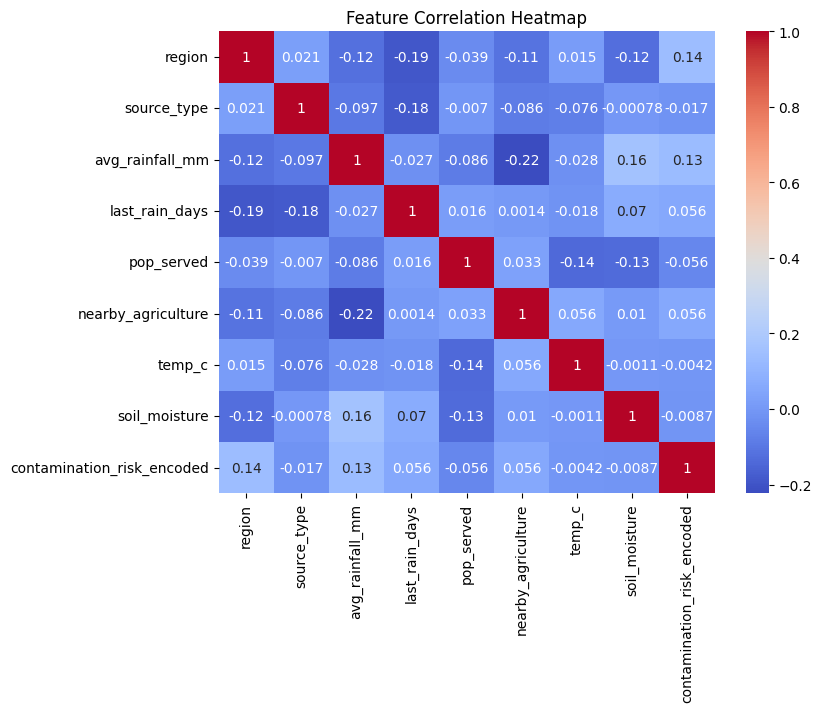

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 2: convert categorical variables into numerical variables using label encoding
df_copy = df.copy()

# Columns to encode
categorical_columns = ['region', 'source_type', 'soil_moisture', 'nearby_agriculture', 'contamination_risk']

label_encoder = {}  # Dictionary to store encoders

for column in categorical_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
    label_encoder[column] = le

# Step 3: separate features and label
X = df_copy.drop(columns=['contamination_risk', 'source_id'])  # Features
y = df_copy['contamination_risk']  # Target

# Now add contamination_risk_encoded column to df_copy (for heatmap only)
df_copy['contamination_risk_encoded'] = y

# Select numeric columns from X for heatmap
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_copy[numeric_cols + ['contamination_risk_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [5]:
# check the result
print("✅ features shape", X.shape)
print('🎯target shape', y.shape)

✅ features shape (100, 8)
🎯target shape (100,)


#### **Step 4–5: Split the Data and Train the Model**

Once the data is cleaned and encoded, we move on to building a machine learning model.

- **Step 4 – Train-Test Split:**
We split the dataset into training and testing sets using an 80/20 ratio. This helps evaluate the model's ability to generalize to new, unseen data.

- **Step 5 – Train a Random Forest Classifier:**
We build a Random Forest model — a robust and widely-used classification algorithm that combines multiple decision trees to improve performance and reduce overfitting.
The model is trained on the training data (X_train, y_train) using 100 decision trees.

In [ ]:
# step 4 : split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# step 5: build the model
from sklearn.ensemble import RandomForestClassifier 

# create the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### **Step 6 & 7: Make Predictions and Evaluate the Model**

Once the Random Forest model is trained:

**Step A6:** We use the model to make predictions on the test dataset (X_test) — this simulates how the model would perform on unseen data.

**Step A7:** We evaluate the model’s performance using:

- ``Confusion Matrix:`` Shows how many predictions were correct vs. incorrect across each class

- ``Classification Report:`` Provides detailed metrics like precision, recall, and F1-score for each class of contamination risk

This step helps us understand how well the model is identifying various levels of contamination risk.

Confusion Matrix:
[[4 1 3 0]
 [2 1 1 0]
 [1 2 2 0]
 [1 1 1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.20      0.25      0.22         4
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         3

    accuracy                           0.35        20
   macro avg       0.25      0.29      0.26        20
weighted avg       0.31      0.35      0.33        20



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

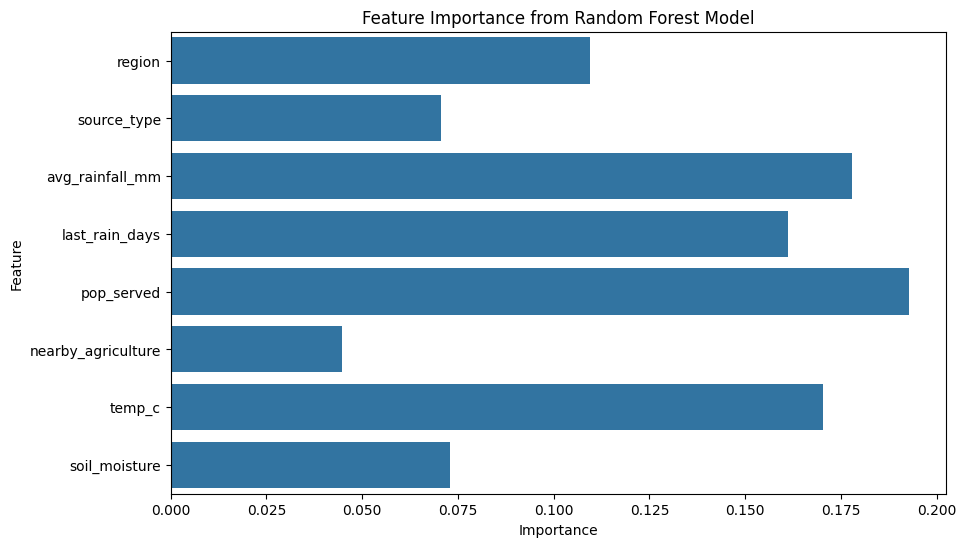

In [22]:
# Step 6: make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

# classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

# --- Insert Feature Importance Plot here ---
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


#### **Step 8: Hyperparameter tuning with GridSearchCV**

In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_grid=param_grid,
                        cv=3,
                        n_jobs=-1,
                        verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate again
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Confusion Matrix (Best Model):
[[4 1 3 0]
 [2 1 1 0]
 [1 1 3 0]
 [0 0 3 0]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.33      0.25      0.29         4
           2       0.30      0.60      0.40         5
           3       0.00      0.00      0.00         3

    accuracy                           0.40        20
   macro avg       0.30      0.34      0.30        20
weighted avg       0.37      0.40      0.37        20



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

#### **Step 9: Save Feature Names**

To keep track of the features used during model training, we save the list of feature column names.
This is useful for later stages like interpreting model results or applying the model to new data.

In [8]:
# Save the list of features used during training
feature_columns = X.columns.tolist()

#### **Step 10: Predict Contamination Risk for New Water Sources**

In this step:

- we create new hypothetical water source samples with their features encoded the same way as our training data. Then, we use our trained Random Forest model to predict the contamination risk for these new sources.

- We transform categorical features (like region, source_type, etc.) into their encoded numeric forms using the saved label encoders.

- We reorder columns to ensure the data matches the model’s expected input.

- Finally, we predict the contamination risk and convert the numeric predictions back to human-readable labels.

In [14]:
new_sources = pd.DataFrame([
    {
        "avg_rainfall_mm": 12,
        "last_rain_days": 40,
        "pop_served": 80,
        "region": label_encoder["region"].transform(["Azilal"])[0],
        "source_type": label_encoder["source_type"].transform(["well"])[0],
        "nearby_agriculture": label_encoder["nearby_agriculture"].transform(["yes"])[0],
        "temp_c": 37,
        "soil_moisture": label_encoder["soil_moisture"].transform(["very_low"])[0]
    },
    {
        "avg_rainfall_mm": 60,
        "last_rain_days": 5,
        "pop_served": 300,
        "region": label_encoder["region"].transform(["Rabat"])[0],
        "source_type": label_encoder["source_type"].transform(["river"])[0],
        "nearby_agriculture": label_encoder["nearby_agriculture"].transform(["no"])[0],
        "temp_c": 25,
        "soil_moisture": label_encoder["soil_moisture"].transform(["medium"])[0]
    }
])

# Reorder the columns to match the trained model's feature order
new_sources = new_sources[feature_columns]

# Predict contamination risk for the new water sources using the trained model
new_predictions = model.predict(new_sources)

# Convert the encoded predictions back to original labels (e.g., "high", "medium", "low")
predicted_risks = label_encoder["contamination_risk"].inverse_transform(new_predictions)

# Display the predicted contamination risk for each new water source
for i, risk in enumerate(predicted_risks):
    print(f"Water Source {i+1} → Predicted Risk: {risk}")


Water Source 1 → Predicted Risk: low
Water Source 2 → Predicted Risk: high


#### **Feature Importance (Understand What Influences Risk Most)**

So that i can identify which features most influence the model's predictions.

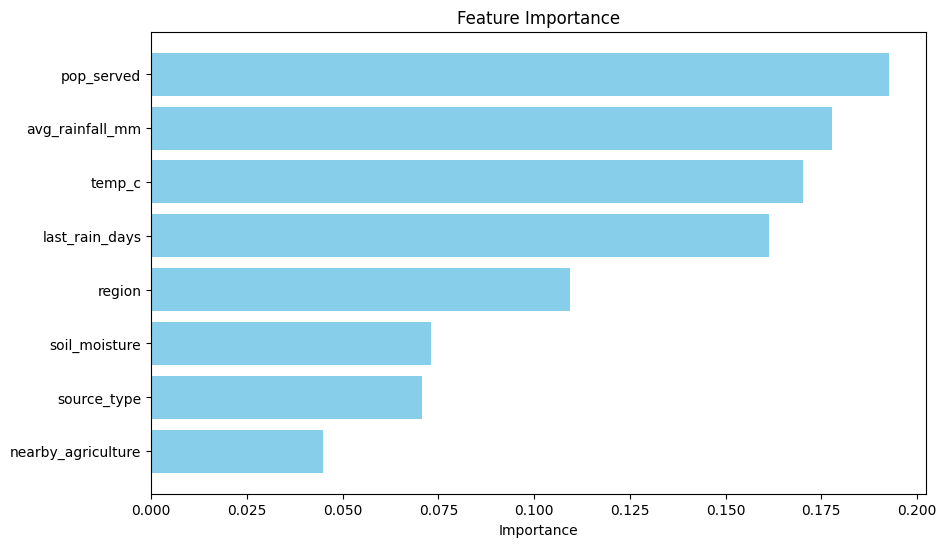

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


#### **Tuning my model for better performance**

Right now, i'm using the default RandomForestClassifier, to improve accuracy with hyperparameter tuning using GridSearch:

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.25      0.25      0.25         4
           2       0.38      0.60      0.46         5
           3       0.00      0.00      0.00         3

    accuracy                           0.45        20
   macro avg       0.31      0.37      0.33        20
weighted avg       0.39      0.45      0.42        20



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

#### **Step 11: Attach Predictions to New Data and Save Results**

In this step, we:

- Add the predicted contamination risk labels to the new water sources data.
- Optionally convert the encoded numeric columns back to their original readable categorical names.
- Save the final dataframe with predictions to a CSV file (`predicted_water_sources.csv`) for easy sharing or further analysis.


In [30]:
# Attach predictions
new_sources_final = new_sources.copy()
new_sources_final["predicted_risk"] = predicted_risks

# Safe decoding
def safe_inverse_transform(series, mapping_dict):
    return series.apply(lambda x: mapping_dict.get(x, f"Unknown_{x}"))

# Use same mappings as in training
label_mappings = {
    "region": {0: "El Jadida", 1: "Errachidia", 2: "Fes", 3: "Rabat", 4: "Tanger", 5: "Taza"},
    "source_type": {0: "river", 1: "shared_tap", 2: "spring", 3: "tap_in_home", 4: "well"},
    "nearby_agriculture": {0: "no", 1: "yes"},
    "soil_moisture": {0: "high", 1: "low", 2: "medium", 3: "very_low"}
}

# Apply decoding safely
for col in ["region", "source_type", "nearby_agriculture", "soil_moisture"]:
    if col in new_sources_final.columns:
        new_sources_final[col] = safe_inverse_transform(new_sources_final[col], label_mappings[col])

# Save to CSV
output_path = "predicted_water_sources.csv"
new_sources_final.to_csv(output_path, index=False)
print(f"✅ Predictions saved to: {output_path}")

✅ Predictions saved to: predicted_water_sources.csv
